In [1]:
%matplotlib inline
%run grammar
%run gsc2
# A lot of changes have been made. The LF-SS-PF example won't work with this new version. 
# In the example, we used a non-default quantization scheme; roles compete with each other for each filler. 
# Later, I will fix the problem.

In [2]:
gram1 = Grammar('S -> A A; S -> B B')
role_names, filler_names, WGC, bGC = gram1.getNetworkInfo()
#bGC.shape           # Currently, bGC is a 2d-array.
bGC = bGC.squeeze()  # bGC should be a 1d-array.

In [3]:
# If refset is provided, the program computes the distance from the current state to each of these reference points.
refset = [['S/r', 'S[1]/0r', 'A/00r', 'A/10r'],
          ['S/r', 'S[2]/0r', 'B/00r', 'B/10r']]

In [4]:
# Construct a GSC network model.
net = GscNet(filler_names=filler_names, role_names=role_names, WGC=WGC, bGC=bGC, 
             T_init=0.1, T_decay_rate=0.001, q_init=0, q_max=200, q_rate=0.08, beta=12, grid_points=refset, getGPset=True)
# When getGPset is set to True, the program generaets a set of all grid points (ordered by H0).
# H1 (if z=0.5, bowl center parameter) and Q should be same across all grid points)
# CAUTION! by default, this parameter is set to False. If you run a large model (with a large number of fillers and a large number of roles), 
# generating the set of all grid points will take forever. Practically useless. In that case, do not set getGPset to True.

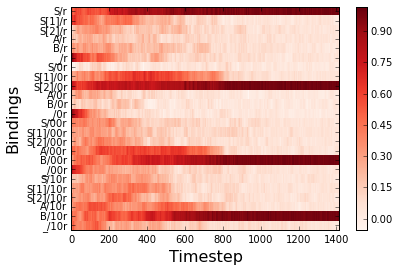

In [5]:
# with no input --- may fail to build a grammatical structure
net.reset()   # Set T and q to their initial values T_init and q_init.
              # Also set the network's state to a point in a unit hypercube.
              # Each state is set to a value pseudo-randomly sampled from a uniform distribution.
net.run(5000, plot=True, tol=1e-2, norm_ord=np.inf)

In [6]:
gp = net.read_grid_point()

['S/r', 'S[2]/0r', 'B/00r', 'B/10r']


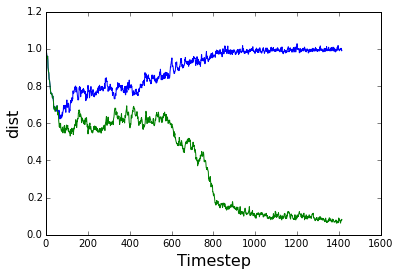

In [7]:
net.plot_trace('dist')   # The program does not provide which line corresponds to which reference point. Will be fixed later.

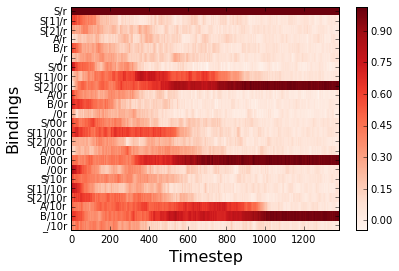

In [8]:
# To model production, it may be better to clamp the 'S/r' binding.
net.reset()
net.clamp('S/r')
net.run(10000, plot=True, tol=1e-2, norm_ord=np.inf)

In [9]:
net.read_state()
gp = net.read_grid_point()

             r        0r       00r       10r
S     1.000000  0.034111  0.066054  0.063726
S[1]  0.022704  0.052127  0.037499  0.045447
S[2]  0.017398  0.990287  0.055418  0.052158
A     0.037943  0.041095  0.045464  0.020402
B     0.029881  0.045871  0.993516  0.978001
_     0.080887  0.001906  0.046655  0.027631
['S/r', 'S[2]/0r', 'B/00r', 'B/10r']


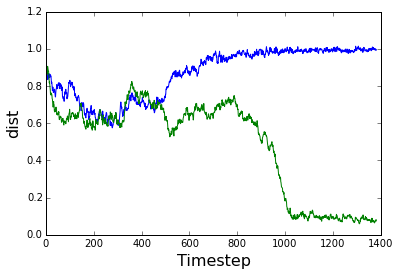

In [10]:
net.plot_trace('dist')

In [11]:
# For multiple runs, use the sim class. 
# Still working on this class. For now, it may not be easy to use.
# For demonstration, we will repeat the above model (production by clamping 'S/r') 10 times.
# It may take long.
input_list = ['S/r']
input_vals = [1.0]
params = {'testvar': 'ema_speed', 
          'norm_ord': np.inf,# 2,
          'convergence_check': True,
          'dist_space': 'S',
          'tol': 1e-3, #None, # 1e-2 
          'ema_factor': 0.1, 
          'grid_points': refset, 
          'input_method': 'clamp',      # the bindings provided in input_list will be clamped.
          'overlap_timesteps': 100,     # overalpping timesteps (not used in this production model)
          'cumulative_input': False,    # True (only meaning in incremental processing)
          'input_inhib': False,
          'update_T': False, 
          'update_q': True, 
          'maxstep': np.array([5000]),  # For now, it should be a 1d-array. 
          'nrep': 10,                   # Number of repetitions 
          'carry_over': 0,              # not yet implemented (ignore this)
          'q_fun': 'plinear',
          'ext_overlap': None,
          'ext_overlap_steps': 0}

net.grid_points = params['grid_points']
net.reset()
sim1 = sim(net, params)
sim1.input_list = input_list
sim1.input_vals = input_vals
sim1.simulate()

In [12]:
# This works only when net (provided to sim class) was constructed with getGPset = True.
# This gives you the probability of a grid point being chosen at each time step with the 'snap-it' method
gp_prob_trace = sim1.compute_gpdist()

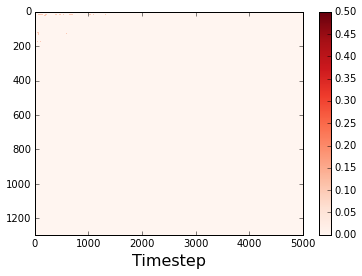

In [13]:
# All grid points. Too many grid points (even in this small model). Hard to see the small red dots.
sim1.plot_gp_prob_trace(word_num=1, gp_prob_trace=gp_prob_trace, yticklab=False)

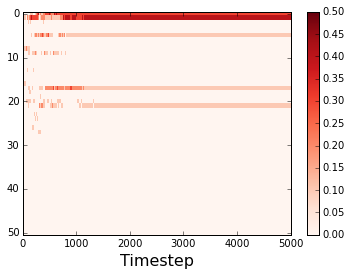

In [14]:
# You can choose a fixed number of grid points with highest harmony (ngp). 
# Still the number is large. So we suppress the ytick label.
sim1.plot_gp_prob_trace(word_num=1, gp_prob_trace=gp_prob_trace, yticklab=False, ngp=50)

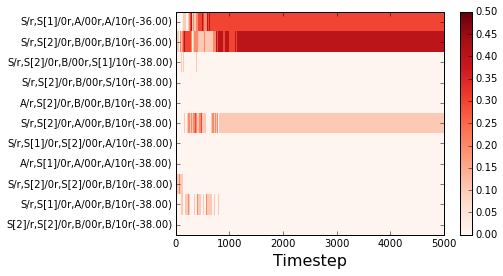

In [15]:
sim1.plot_gp_prob_trace(word_num=1, gp_prob_trace=gp_prob_trace, yticklab=True, ngp=10)

In [16]:
sim1.rt

array([[ 5000.],
       [ 5000.],
       [ 5000.],
       [ 5000.],
       [ 5000.],
       [ 5000.],
       [ 5000.],
       [ 5000.],
       [ 5000.],
       [ 5000.]])